In [1]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import date, datetime

In [2]:
FAANG = ["META", "AAPL", "AMZN", "NFLX", "GOOG"]
today = date.today()
data = []

for ticker in FAANG:

    prices = yf.download(ticker, 
                       start='2020-01-01', 
                       end=today, 
                       progress=False, auto_adjust=True)

    L = len(prices["Close"])
    returns = np.zeros(L - 1)
    for i in range(L - 1):
        returns[i] = np.log(prices["Close"][i+1] / prices["Close"][i]) * 100
    
    data.append(returns)

In [3]:
from scipy import stats

In [4]:
index = 0
for log_returns in data:
    jarque_bera_test = stats.jarque_bera(log_returns)
    print(FAANG[index], " ", jarque_bera_test)
    index+=1

META   Jarque_beraResult(statistic=14687.854190681397, pvalue=0.0)
AAPL   Jarque_beraResult(statistic=548.9030341322939, pvalue=0.0)
AMZN   Jarque_beraResult(statistic=480.5320328791277, pvalue=0.0)
NFLX   Jarque_beraResult(statistic=47513.686524236575, pvalue=0.0)
GOOG   Jarque_beraResult(statistic=323.5364867455015, pvalue=0.0)


In [5]:
from seaborn import kdeplot

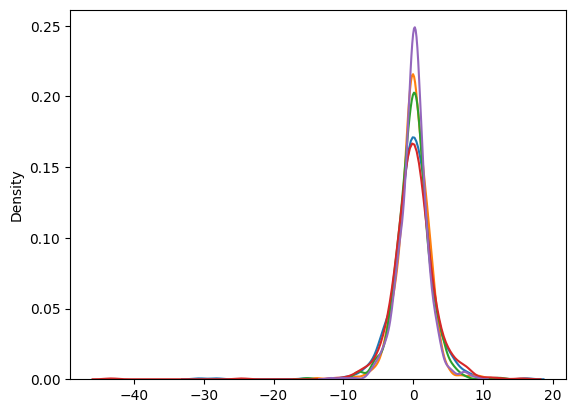

In [6]:
for log_returns in data:
    kdeplot(log_returns)

In [7]:
from scipy import stats

In [8]:
index = 0
for log_returns in data:
    print(FAANG[index])
    print("Skew: ", stats.skew(log_returns))
    print("Kurtosis: ", stats.kurtosis(log_returns))
    index+=1

META
Skew:  -2.0869073987086475
Kurtosis:  20.942917438461457
AAPL
Skew:  -0.13027623965892596
Kurtosis:  4.119997567891846
AMZN
Skew:  -0.10880617520140139
Kurtosis:  3.8564412053917128
NFLX
Skew:  -2.9373066090929507
Kurtosis:  37.956389003884134
GOOG
Skew:  -0.19187610276176997
Kurtosis:  3.1460851158842607


## Value at Risk

In [9]:
p = 0.05

#### Empirical Distribution

In [10]:
var = np.quantile(data[2], p)
print("Value aat Risk: ", var)

Value aat Risk:  -3.7444243759115117


#### Gaussian Distribution

In [11]:
var = stats.norm.ppf(p) * np.std(data[2])
print("Value at Risk: ", var)

Value at Risk:  -4.049990488512376


## Exponential Weighted Moving Average

#### $$\sigma^2_n = (1 - \lambda) u^2_{n-1} + \lambda \sigma^2_{n-1}$$ 

In [12]:
w = 0.94
historical_returns = data[2] # AMZN
ewma = np.zeros(len(historical_returns) - 1)
initial_vol = historical_returns[0] ** 2

Text(0.5, 1.0, 'Log Returns')

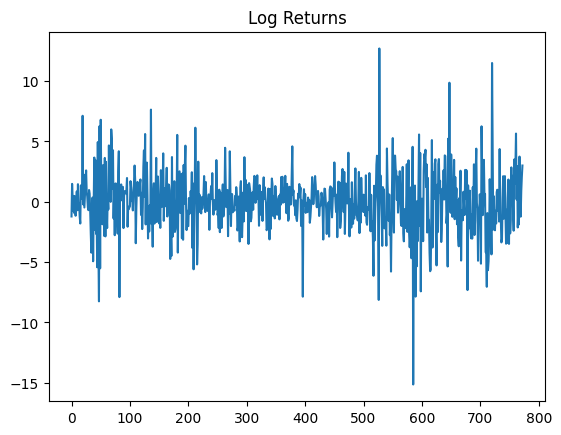

In [13]:
plt.plot(historical_returns)
plt.title("Log Returns")

In [14]:
for i in range(1, len(historical_returns)):
    ewma[i - 1] = ((1 - w) * historical_returns[i]**2) + (w * initial_vol)
    initial_vol = ewma[i - 1]

Text(0.5, 1.0, 'Exponential Weighted Moving Average')

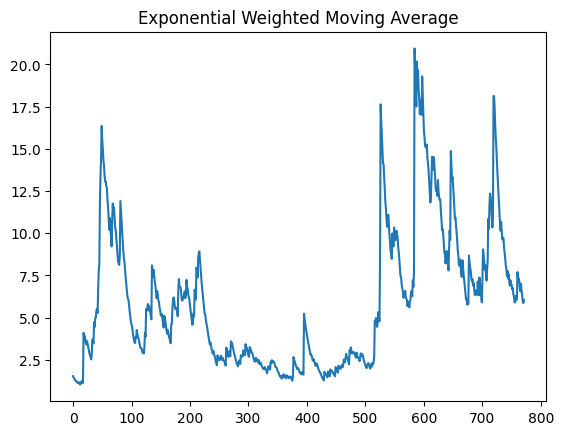

In [15]:
plt.plot(ewma)
plt.title("Exponential Weighted Moving Average")

In [16]:
threshold = -1.64 * ewma 
interval = np.linspace(1, len(data[2][1:]), len(data[2][1:]))

Text(0.5, 1.0, 'Value at Risk Backtest')

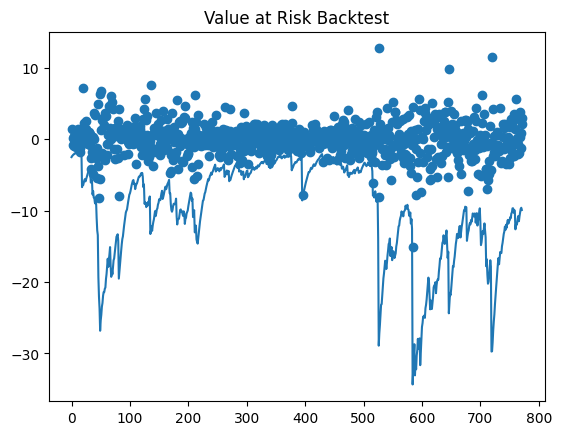

In [17]:
plt.plot(threshold)
plt.scatter(interval, data[2][1:])
plt.title("Value at Risk Backtest")

In [18]:
sliced_data = data[2][1:]
count = 0
for i in range(len(interval)):
    if sliced_data[i] <= threshold[i]:
        count+=1

In [19]:
print("Total Exception Count: ", count)

Total Exception Count:  1


In [20]:
probability = count / len(interval) * 100
print("Probability: ", probability)

Probability:  0.1295336787564767
